In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [44]:
#load the car_dataset 
car = pd.read_csv('C:/DATASETS/Dataset/Car_dataset.csv')

In [45]:
# read the data file
car.head(4)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0


In [46]:
# deatils 
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [47]:
#find the no.of columns and rows 
car.shape

(301, 9)

In [48]:
# find the duplicates values 
car.duplicated().sum()

2

In [49]:
# remove the duplicated values
car[car.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [50]:
# find the missing values
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<AxesSubplot: >

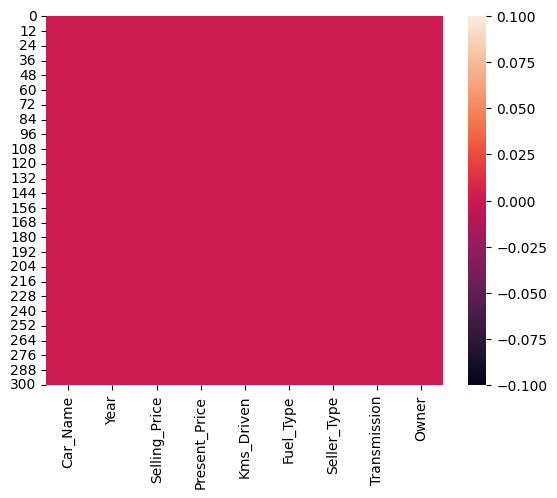

In [51]:
# uding the heatmap find the missing values
sns.heatmap(car.isnull())

In [52]:
# checking the distribution of the categorical data
print(car.Fuel_Type.value_counts())
print(car.Seller_Type.value_counts())
print(car.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [53]:
# encoding the categorical data
# change the fuel types
car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
# change the seller type 
car.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
# change the transmission 
car.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [54]:
# spliting the data and traget
X = car.drop(['Car_Name','Selling_Price'],axis=1)
Y = car['Selling_Price']

In [55]:
# splitting training and test data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [56]:
# model train
# 1. Linear regression
lin_reg_model = LinearRegression()

In [57]:
# fit the data in linear regression
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [58]:
# model evaluation
# prection on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [59]:
# R square error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print(error_score)

0.8838169193709792


Text(0.5, 1.0, 'ACTUAL VS PREDICTION PRICE')

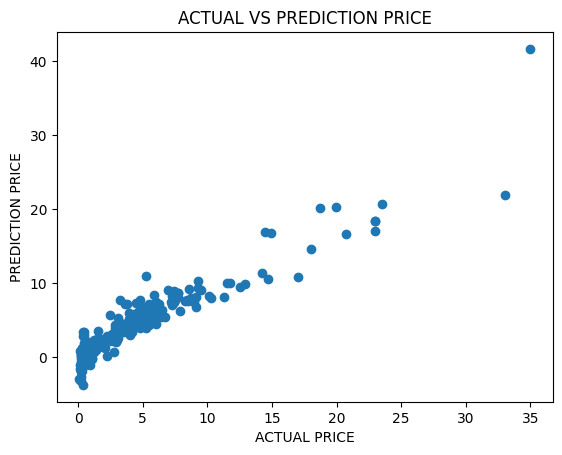

In [60]:
# visualize the actual price and prediction price
plot.scatter(Y_train, training_data_prediction)
plot.xlabel('ACTUAL PRICE')
plot.ylabel('PREDICTION PRICE')
plot.title('ACTUAL VS PREDICTION PRICE')

In [61]:
# prection on testing data
training_data_prediction = lin_reg_model.predict(X_test)

In [62]:
# R square error
error_score = metrics.r2_score(Y_test, training_data_prediction)
print(error_score)

0.8401532365378521


Text(0.5, 1.0, 'ACTUAL VS PREDICTION PRICE')

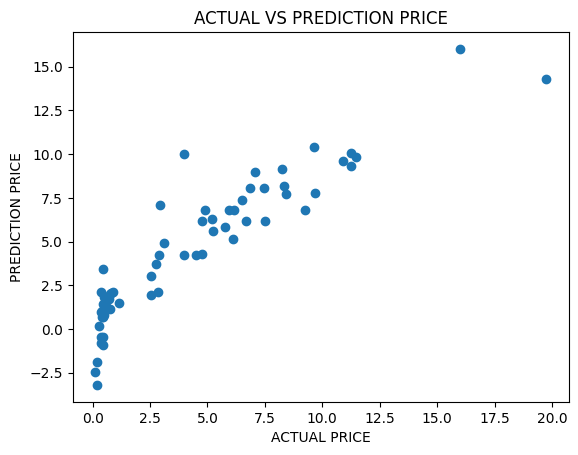

In [63]:
# visualize the actual price and prediction price
plot.scatter(Y_test, training_data_prediction)
plot.xlabel('ACTUAL PRICE')
plot.ylabel('PREDICTION PRICE')
plot.title('ACTUAL VS PREDICTION PRICE')

In [64]:
# lasso regresssion
lesso_reg_model=Lasso()

In [65]:
#fit the data in the lasso regression 
lesso_reg_model.fit(X_train, Y_train)

Lasso()

In [67]:
# model evaluation
# prection on training data
training_data_prediction = lesso_reg_model.predict(X_train)

In [70]:
# R square error
error_score=metrics.r2_score(Y_train, training_data_prediction)
print(error_score)

0.843587395258283


Text(0.5, 1.0, 'ACTUAL VS PREDICTION PRICE')

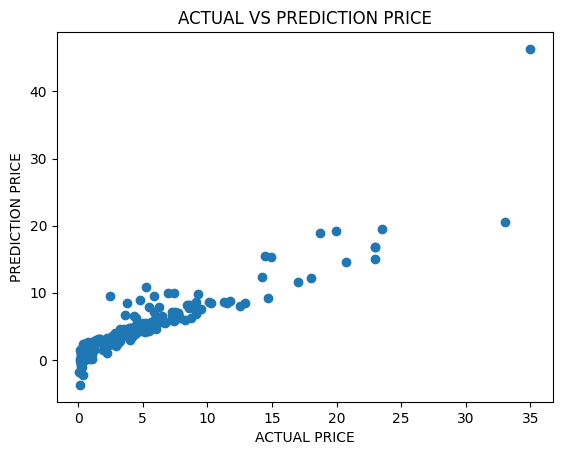

In [72]:
plot.scatter(Y_train, training_data_prediction)
plot.xlabel('ACTUAL PRICE')
plot.ylabel('PREDICTION PRICE')
plot.title('ACTUAL VS PREDICTION PRICE')

In [73]:
# prection on testing data
training_data_prediction = lesso_reg_model.predict(X_test)

In [74]:
# R square error
error_score = metrics.r2_score(Y_test, training_data_prediction)
print(error_score)

0.8497457570738539


Text(0.5, 1.0, 'ACTUAL VS PREDICTION PRICE')

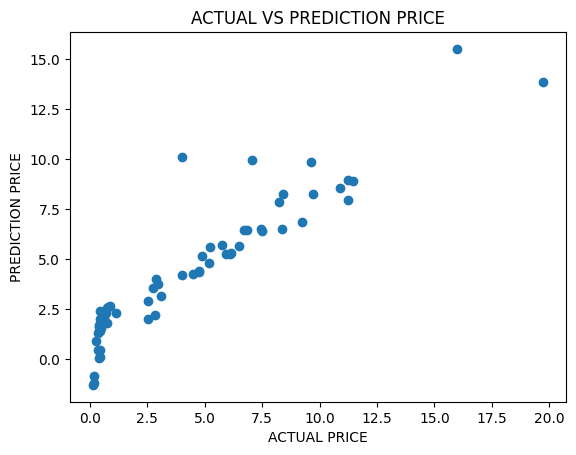

In [75]:
# visualize the actual price and prediction price
plot.scatter(Y_test, training_data_prediction)
plot.xlabel('ACTUAL PRICE')
plot.ylabel('PREDICTION PRICE')
plot.title('ACTUAL VS PREDICTION PRICE')